In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import os

In [2]:
eosdir_pos = '/eos/uscms/store/user/jennetd/smart-pixels/dataset678/unflipped-positive/'
eosdir_neg = '/eos/uscms/store/user/jennetd/smart-pixels/dataset678/unflipped-negative/'

df_true = pd.DataFrame()
df_data = pd.DataFrame()

pos = True

if pos:
    print('Processing + charge')
    for f in os.listdir(eosdir_pos):
    
        if 'recon' in f:
            continue
        
        df_true = pd.concat([df_true,pd.read_csv(eosdir_pos+f)])
        df_data = pd.concat([df_data,pd.read_csv(eosdir_pos+"/recon3D_"+f.split('_')[1])])
        
        df_data = df_data[df_true['pt']>=4]
        df_true = df_true[df_true['pt']>=4]
        
        if len(df_true>0):
            break
        

Processing + charge


In [3]:
def plot_nonzero_pix(e):
    nonzeroPix = np.where(np.sum(e,axis=0)>0)[0]
    e_nonzero = e[:,nonzeroPix] 
    xpoints = np.linspace(200,4000,20)
    print(xpoints)

    plt.plot(xpoints,e_nonzero)
    plt.xlabel('time [ps]')
    plt.ylabel('Integrated electrons')

    plt.show()
    
def plot_nonzero_pix_ddt(e,filename):
    nonzeroPix = np.where(np.sum(e,axis=0)>0)[0]
    e_nonzero = e[:,nonzeroPix]
    xpoints = np.linspace(200,3800,19)

    e_ddt = np.diff(e_nonzero,axis=0)/200

    df = pd.DataFrame(e_ddt)
    df.to_csv(filename)
    
    plt.plot(xpoints,e_ddt)
    plt.xlabel('time [ps]')
    plt.ylabel('e/ps')

    plt.show()

In [4]:
# high pT, pos charge
df_true.head()

,x-entry,y-entry,z-entry,n_x,n_y,n_z,number_eh_pairs,y-local,pt,cotAlpha,cotBeta,y-midplane,x-midplane
168,187.044159,24.311161,100.0,-13.655230,-0.700045,-4.639349,23808.0,-4.54474,4.68368,2.943350,0.150893,16.766514,39.876636
198,-17.225357,-20.968143,100.0,-3.953699,0.966415,-4.379457,9549.0,8.03440,4.48457,0.902783,-0.220670,-9.934640,-62.364503
492,-368.996674,1.749384,100.0,29.865509,-0.201095,-4.373445,52483.0,-1.11688,4.38006,-6.828829,0.045981,-0.549662,-27.555213
671,-189.386169,-16.301287,100.0,15.429353,0.390959,-3.991988,33562.0,3.78622,4.00553,-3.865080,-0.097936,-11.404491,3.867831
848,196.262253,-11.582542,100.0,-17.304325,0.324598,-4.256927,36545.0,3.48433,4.27893,4.064980,-0.076252,-7.769956,-6.986769


[ 200.  400.  600.  800. 1000. 1200. 1400. 1600. 1800. 2000. 2200. 2400.
 2600. 2800. 3000. 3200. 3400. 3600. 3800. 4000.]


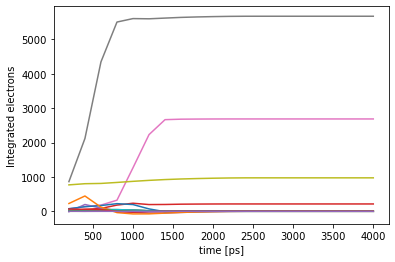

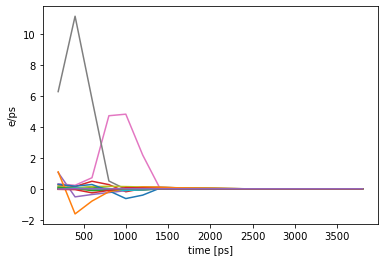

x-entry             -17.225357
y-entry             -20.968143
z-entry             100.000000
n_x                  -3.953699
n_y                   0.966415
n_z                  -4.379457
number_eh_pairs    9549.000000
y-local               8.034400
pt                    4.484570
cotAlpha              0.902783
cotBeta              -0.220670
y-midplane           -9.934640
x-midplane          -62.364503
Name: 198, dtype: float64


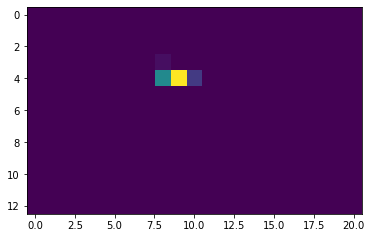

In [5]:
# high y-local
df_data_p7 = df_data[df_true['y-local']>7]
df_true_p7 = df_true[df_true['y-local']>7]
plot_nonzero_pix(np.array(df_data_p7.iloc[0]).reshape(20,273))
plot_nonzero_pix_ddt(np.array(df_data_p7.iloc[0]).reshape(20,273),'pos_highy.csv')

print(df_true_p7.iloc[0])

plt.imshow(np.array(df_data_p7.iloc[0]).reshape(20,13,21)[-1,:,:])

[ 200.  400.  600.  800. 1000. 1200. 1400. 1600. 1800. 2000. 2200. 2400.
 2600. 2800. 3000. 3200. 3400. 3600. 3800. 4000.]


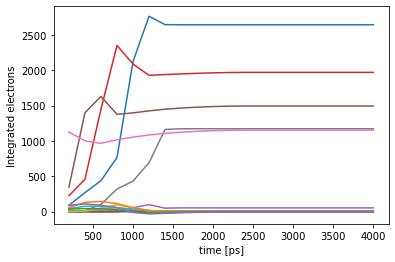

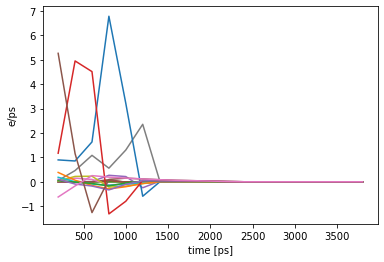

x-entry             -31.205147
y-entry              14.238536
z-entry             100.000000
n_x                  -0.594437
n_y                  -0.986493
n_z                  -3.919304
number_eh_pairs    8484.000000
y-local              -7.766560
pt                    4.041130
cotAlpha              0.151669
cotBeta               0.251701
y-midplane            1.653483
x-midplane          -38.788598
Name: 1801, dtype: float64


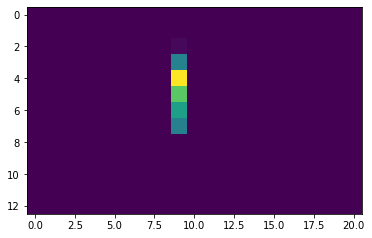

In [6]:
# low y-local
df_data_m7 = df_data[df_true['y-local']<-7]
df_true_m7 = df_true[df_true['y-local']<-7]
plot_nonzero_pix(np.array(df_data_m7.iloc[0]).reshape(20,273))
plot_nonzero_pix_ddt(np.array(df_data_m7.iloc[0]).reshape(20,273),'pos_lowy.csv')

plt.imshow(np.array(df_data_m7.iloc[0]).reshape(20,13,21)[-1,:,:])

print(df_true_m7.iloc[0])

[ 200.  400.  600.  800. 1000. 1200. 1400. 1600. 1800. 2000. 2200. 2400.
 2600. 2800. 3000. 3200. 3400. 3600. 3800. 4000.]


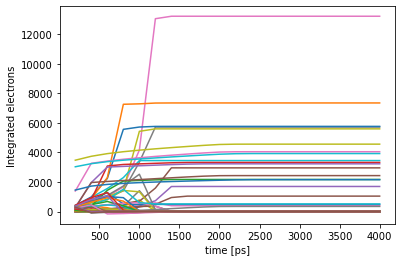

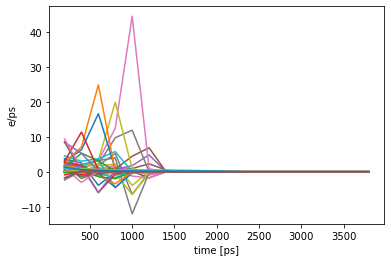

x-entry              312.164917
y-entry               -0.873454
z-entry              100.000000
n_x                  -31.014191
n_y                    0.037157
n_z                   -4.650243
number_eh_pairs    74518.000000
y-local                0.284128
pt                     4.592050
cotAlpha               6.669370
cotBeta               -0.007990
y-midplane            -0.473937
x-midplane           -21.303581
Name: 2436, dtype: float64


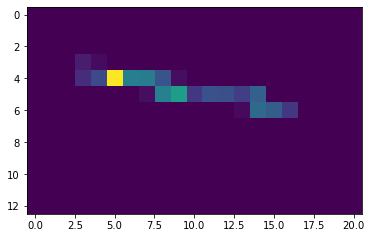

In [7]:
# central y-local
df_data_0 = df_data[(df_true['y-local']>-0.5) & (df_true['y-local']<0.5)]
df_true_0 = df_true[(df_true['y-local']>-0.5) & (df_true['y-local']<0.5)]
plot_nonzero_pix(np.array(df_data_0.iloc[0]).reshape(20,273))
plot_nonzero_pix_ddt(np.array(df_data_0.iloc[0]).reshape(20,273),'pos_midy.csv')

print(df_true_0.iloc[0])

plt.imshow(np.array(df_data_0.iloc[0]).reshape(20,13,21)[-1,:,:])

In [8]:
neg = True

if neg:
    print('Processing - charge')
    for f in os.listdir(eosdir_neg):
        if 'recon' in f:
            continue
        
        df_true = pd.concat([df_true,pd.read_csv(eosdir_neg+f)])
        df_data = pd.concat([df_data,pd.read_csv(eosdir_neg+"/recon3D_"+f.split('_')[1])])
        
        df_data = df_data[df_true['pt']<=-4.5]
        df_true = df_true[df_true['pt']<=-4.5]
        
        if len(df_true>0):
            break

Processing - charge


[ 200.  400.  600.  800. 1000. 1200. 1400. 1600. 1800. 2000. 2200. 2400.
 2600. 2800. 3000. 3200. 3400. 3600. 3800. 4000.]


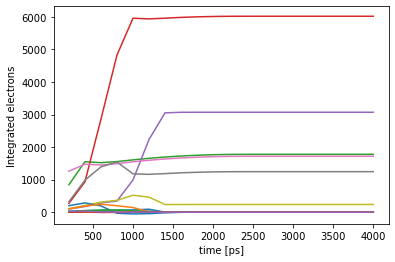

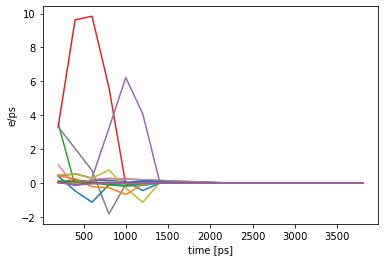

x-entry              -59.547516
y-entry              -18.853952
z-entry              100.000000
n_x                    5.833304
n_y                    1.277045
n_z                   -4.696022
number_eh_pairs    14070.000000
y-local                7.086910
pt                    -4.867830
cotAlpha              -1.242180
cotBeta               -0.271942
y-midplane            -5.256859
x-midplane             2.561478
Name: 2409, dtype: float64


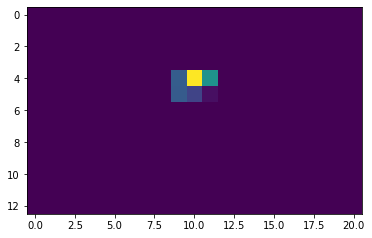

In [9]:
# high y-local
df_data_p7 = df_data[df_true['y-local']>7]
df_true_p7 = df_true[df_true['y-local']>7]
plot_nonzero_pix(np.array(df_data_p7.iloc[0]).reshape(20,273))
plot_nonzero_pix_ddt(np.array(df_data_p7.iloc[0]).reshape(20,273),'neg_highy.csv')

print(df_true_p7.iloc[0])

plt.imshow(np.array(df_data_p7.iloc[0]).reshape(20,13,21)[-1,:,:])

[ 200.  400.  600.  800. 1000. 1200. 1400. 1600. 1800. 2000. 2200. 2400.
 2600. 2800. 3000. 3200. 3400. 3600. 3800. 4000.]


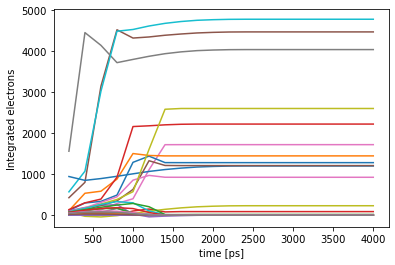

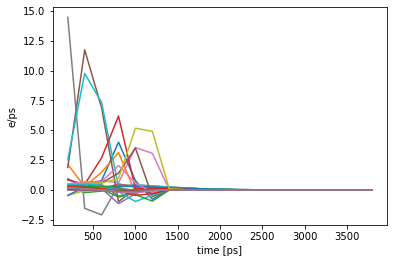

x-entry              -14.103802
y-entry               11.137374
z-entry              100.000000
n_x                   -4.379749
n_y                   -1.070880
n_z                   -4.665899
number_eh_pairs    26264.000000
y-local               -7.060990
pt                    -4.787340
cotAlpha               0.938672
cotBeta                0.229512
y-midplane            -0.338228
x-midplane           -61.037405
Name: 271, dtype: float64


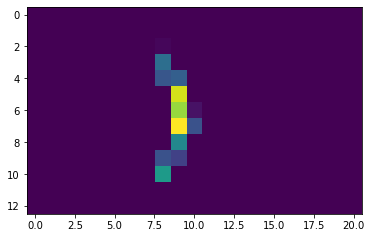

In [10]:
# low y-local
df_data_m7 = df_data[df_true['y-local']<-7]
df_true_m7 = df_true[df_true['y-local']<-7]
plot_nonzero_pix(np.array(df_data_m7.iloc[0]).reshape(20,273))
plot_nonzero_pix_ddt(np.array(df_data_m7.iloc[0]).reshape(20,273),'neg_lowy.csv')

print(df_true_m7.iloc[0])

plt.imshow(np.array(df_data_m7.iloc[0]).reshape(20,13,21)[-1,:,:])

[ 200.  400.  600.  800. 1000. 1200. 1400. 1600. 1800. 2000. 2200. 2400.
 2600. 2800. 3000. 3200. 3400. 3600. 3800. 4000.]


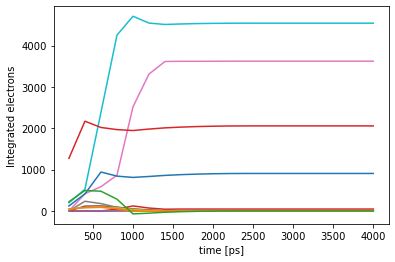

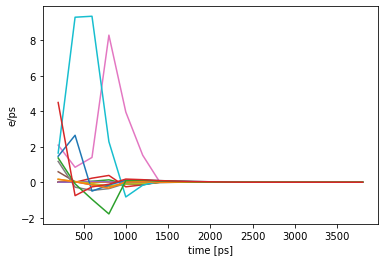

x-entry               53.387062
y-entry                2.653252
z-entry              100.000000
n_x                   -3.389895
n_y                   -0.078807
n_z                   -4.603785
number_eh_pairs    11182.000000
y-local                0.020311
pt                    -4.606290
cotAlpha               0.736328
cotBeta                0.017118
y-midplane             1.797358
x-midplane            16.570671
Name: 650, dtype: float64


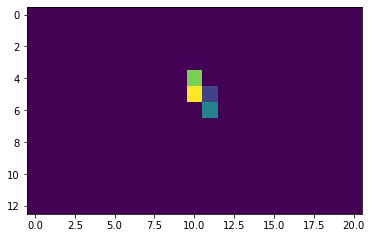

In [11]:
# central y-local
df_data_0 = df_data[(df_true['y-local']>-0.5) & (df_true['y-local']<0.5)]
df_true_0 = df_true[(df_true['y-local']>-0.5) & (df_true['y-local']<0.5)]
plot_nonzero_pix(np.array(df_data_0.iloc[0]).reshape(20,273))
plot_nonzero_pix_ddt(np.array(df_data_0.iloc[0]).reshape(20,273),'neg_midy.csv')

print(df_true_0.iloc[0])

plt.imshow(np.array(df_data_0.iloc[0]).reshape(20,13,21)[-1,:,:])